In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier



In [2]:
# load data, explore the dataset, shows head and columns (5 points)

df = pd.read_csv('divorce-csv.csv')
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
df.columns

Index(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54', 'Class'],
      dtype='object')

In [4]:
# use all columns except "Class" as features, use "Class" as a target (20 points)


x = df.loc[:, df.columns != 'Class']
y = df['Class']

In [5]:
# perform train_test_split() (10 points)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 44) # 70% Training 30% Test

In [6]:
# fit your model with DecisionTreeClassifier() (20 points)

clf = DecisionTreeClassifier()

clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [7]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9803921568627451


In [8]:
from sklearn import tree

[Text(223.20000000000002, 190.26, 'X[8] <= 1.5\nentropy = 0.499\nsamples = 119\nvalue = [62, 57]'),
 Text(167.4, 135.9, 'X[25] <= 1.5\nentropy = 0.088\nsamples = 65\nvalue = [62, 3]'),
 Text(111.60000000000001, 81.53999999999999, 'X[2] <= 3.5\nentropy = 0.031\nsamples = 63\nvalue = [62, 1]'),
 Text(55.800000000000004, 27.180000000000007, 'entropy = 0.0\nsamples = 62\nvalue = [62, 0]'),
 Text(167.4, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(223.20000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(279.0, 135.9, 'entropy = 0.0\nsamples = 54\nvalue = [0, 54]')]

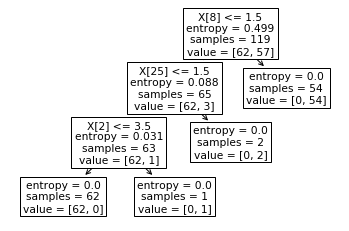

In [9]:
# easy way to plot the tree


from sklearn.tree import DecisionTreeClassifier

tree.plot_tree(clf.fit(x_train, y_train))


In [10]:
# Create a tree chart with graphviz, try changing tree max_depth = x, while x is range from 1-20 (20 points)

from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


In [11]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 10,
                              impurity = True,
                              feature_names = list(df.drop(['Class'], axis=1)),
                              class_names = ['Potential divorce', 'Healthy Marriage'],
                              rounded = True,
                              filled= True )

In [14]:
#Convert .dot to .png to allow display in web notebook

check_call(['dot','-Tpng','tree1.dot','-o','tree1.png'])


FileNotFoundError: [WinError 2] The system cannot find the file specified

In [ ]:
# Annotating chart with PIL
img = Image.open("tree1.png")
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', 18)
draw.text((10, 0), # Drawing offset (position)
          'Divorce Predictors, by Adisak Sukul', # Text to draw
          (0,0,255), # RGB desired color
          font=font) # ImageFont object with desired font
img.save('sample-out.png')
PImage("sample-out.png")